In [93]:
##import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [73]:
## Load the data
flight = pd.read_csv('M1_final.csv')
flight.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,5,2,DL,N101DU,MSP,-9,189,1029,419,...,53,93,SSW,10,0,30.23,Mostly Cloudy,17,15,25
1,11,23,6,DL,N101DU,MSP,-8,190,1029,980,...,28,60,SW,7,0,29.90,Cloudy,31,32,29
2,11,14,4,DL,N101DU,JAX,-5,163,828,510,...,20,54,N,5,0,30.46,Mostly Cloudy,53,20,12
3,11,5,2,DL,N101DU,IAH,-5,250,1417,895,...,50,69,WSW,13,0,30.11,Mostly Cloudy,26,35,17
4,11,6,3,DL,N101DU,DFW,-3,256,1391,1100,...,30,46,WSW,9,0,30.37,Fair,36,31,11


In [74]:
## getting info about the data
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [75]:
## statistical summary of the dataset
flight.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00
mean,7.89,16.02,4.01,6.37,225.29,1267.75,831.00,828.93,910.87,41.49,57.73,12.37,5.54,30.09,31.09,28.43,20.86
std,4.99,8.75,1.99,38.74,119.48,889.34,299.40,305.86,345.41,8.04,23.47,6.26,11.89,0.30,9.51,8.26,6.85
min,1.00,1.00,1.00,-22.00,57.00,94.00,301.00,1.00,1.00,17.00,0.00,0.00,0.00,29.20,0.00,0.00,5.00
25%,1.00,8.00,2.00,-6.00,124.00,483.00,545.00,542.00,667.00,36.00,46.00,8.00,0.00,29.88,26.00,21.00,16.00
50%,11.00,16.00,4.00,-3.00,188.00,1029.00,856.00,854.00,918.00,42.00,59.00,12.00,0.00,30.11,30.00,30.00,19.00
75%,12.00,24.00,6.00,2.00,365.00,2248.00,1095.00,1097.00,1193.00,47.00,74.00,16.00,0.00,30.32,37.00,35.00,25.00
max,12.00,31.00,7.00,1276.00,697.00,4983.00,1439.00,1440.00,1439.00,68.00,97.00,36.00,49.00,30.75,55.00,46.00,41.00


In [76]:
## change the display format
pd.options.display.float_format = '{:.2f}'.format
flight.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00
mean,7.89,16.02,4.01,6.37,225.29,1267.75,831.00,828.93,910.87,41.49,57.73,12.37,5.54,30.09,31.09,28.43,20.86
std,4.99,8.75,1.99,38.74,119.48,889.34,299.40,305.86,345.41,8.04,23.47,6.26,11.89,0.30,9.51,8.26,6.85
min,1.00,1.00,1.00,-22.00,57.00,94.00,301.00,1.00,1.00,17.00,0.00,0.00,0.00,29.20,0.00,0.00,5.00
25%,1.00,8.00,2.00,-6.00,124.00,483.00,545.00,542.00,667.00,36.00,46.00,8.00,0.00,29.88,26.00,21.00,16.00
50%,11.00,16.00,4.00,-3.00,188.00,1029.00,856.00,854.00,918.00,42.00,59.00,12.00,0.00,30.11,30.00,30.00,19.00
75%,12.00,24.00,6.00,2.00,365.00,2248.00,1095.00,1097.00,1193.00,47.00,74.00,16.00,0.00,30.32,37.00,35.00,25.00
max,12.00,31.00,7.00,1276.00,697.00,4983.00,1439.00,1440.00,1439.00,68.00,97.00,36.00,49.00,30.75,55.00,46.00,41.00


In [77]:
## checking missing values
flight.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [78]:
print(flight.dtypes)

MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
OP_UNIQUE_CARRIER     object
TAIL_NUM              object
DEST                  object
DEP_DELAY              int64
CRS_ELAPSED_TIME       int64
DISTANCE               int64
CRS_DEP_M              int64
DEP_TIME_M             int64
CRS_ARR_M              int64
Temperature            int64
Dew Point             object
Humidity               int64
Wind                  object
Wind Speed             int64
Wind Gust              int64
Pressure             float64
Condition             object
sch_dep                int64
sch_arr                int64
TAXI_OUT               int64
dtype: object


In [79]:
## choosing feature=x as Humidity vs target=y as TAXI_OUT
x = flight['Humidity']
y = flight['TAXI_OUT']
# creat aLinear Regression model
LR = LinearRegression()

## Reshape 'x' from 1 D array to a 2d array
x =x.values.reshape(-1,1)
# fitting the model
LR.fit(x,y)
# making prediction
y_pred = LR.predict(x)
# checking the shape of 'y' and 'y-pred'
print(y.shape)
print(y_pred.shape)
## creating dataFrame to compare actual and Predictedvalues
df = pd.DataFrame({'Actual':y,'Predicted':y_pred})
print(df)


(28820,)
(28820,)
       Actual  Predicted
0          25      20.58
1          29      20.84
2          12      20.89
3          17      20.77
4          11      20.95
...       ...        ...
28815      16      20.55
28816      14      20.89
28817      17      20.88
28818      21      20.89
28819      12      21.23

[28820 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

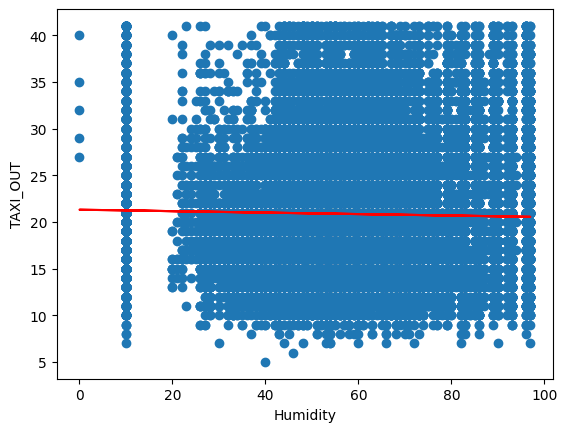

In [80]:
plt.scatter(x,y)
plt.plot(x,y_pred, color = 'red')
plt.xlabel ('Humidity')
plt.ylabel('TAXI_OUT')
plt.show

(28820,)
(28820,)
       Actual  Predicted
0          25      20.67
1          29      21.12
2          12      20.35
3          17      20.83
4          11      20.48
...       ...        ...
28815      16      21.36
28816      14      20.18
28817      17      20.70
28818      21      20.70
28819      12      21.33

[28820 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

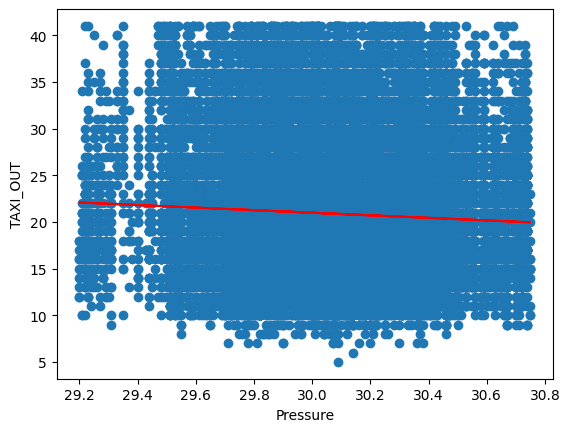

In [82]:
## choosing feature=x as Humidity vs target=y as TAXI_OUT
x = flight['Pressure']
y = flight['TAXI_OUT']
# creat aLinear Regression model
LR = LinearRegression()

## Reshape 'x' from 1 D array to a 2d array
x =x.values.reshape(-1,1)
# fitting the model
LR.fit(x,y)
# making prediction
y_pred = LR.predict(x)
# checking the shape of 'y' and 'y-pred'
print(y.shape)
print(y_pred.shape)
## creating dataFrame to compare actual and Predictedvalues
df = pd.DataFrame({'Actual':y,'Predicted':y_pred})
print(df)
plt.scatter(x,y)
plt.plot(x,y_pred, color = 'red')
plt.xlabel ('Pressure')
plt.ylabel('TAXI_OUT')
plt.show


(28820,)
(28820,)
       Actual  Predicted
0          25      20.76
1          29      20.77
2          12      20.79
3          17      20.79
4          11      20.80
...       ...        ...
28815      16      20.95
28816      14      20.96
28817      17      21.06
28818      21      21.28
28819      12      21.43

[28820 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

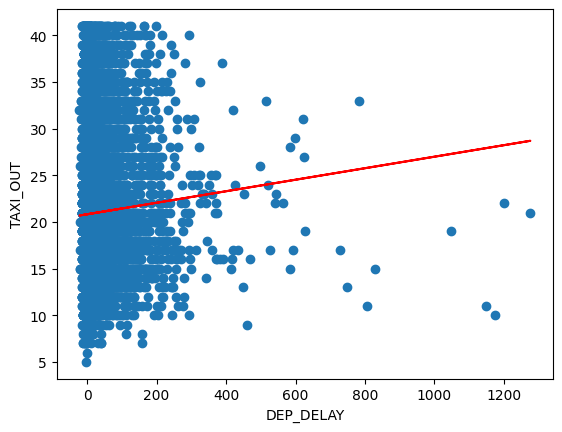

In [83]:
## choosing feature=x as Humidity vs target=y as TAXI_OUT
x = flight['DEP_DELAY']
y = flight['TAXI_OUT']
# creat aLinear Regression model
LR = LinearRegression()

## Reshape 'x' from 1 D array to a 2d array
x =x.values.reshape(-1,1)
# fitting the model
LR.fit(x,y)
# making prediction
y_pred = LR.predict(x)
# checking the shape of 'y' and 'y-pred'
print(y.shape)
print(y_pred.shape)
## creating dataFrame to compare actual and Predictedvalues
df = pd.DataFrame({'Actual':y,'Predicted':y_pred})
print(df)

plt.scatter(x,y)
plt.plot(x,y_pred, color = 'red')
plt.xlabel ('DEP_DELAY')
plt.ylabel('TAXI_OUT')
plt.show

(28820,)
(28820,)
       Actual  Predicted
0          25      20.70
1          29      20.49
2          12      20.35
3          17      20.90
4          11      20.63
...       ...        ...
28815      16      21.38
28816      14      20.90
28817      17      21.45
28818      21      21.52
28819      12      20.83

[28820 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

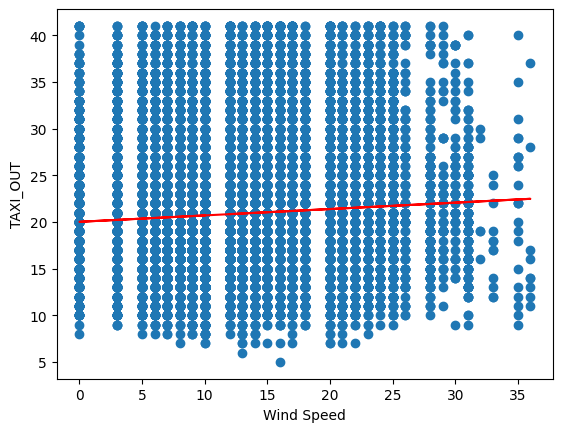

In [84]:
## choosing feature=x as Humidity vs target=y as TAXI_OUT
x = flight['Wind Speed']
y = flight['TAXI_OUT']
# creat aLinear Regression model
LR = LinearRegression()

## Reshape 'x' from 1 D array to a 2d array
x =x.values.reshape(-1,1)
# fitting the model
LR.fit(x,y)
# making prediction
y_pred = LR.predict(x)
# checking the shape of 'y' and 'y-pred'
print(y.shape)
print(y_pred.shape)
## creating dataFrame to compare actual and Predictedvalues
df = pd.DataFrame({'Actual':y,'Predicted':y_pred})
print(df)

plt.scatter(x,y)
plt.plot(x,y_pred, color = 'red')
plt.xlabel ('Wind Speed')
plt.ylabel('TAXI_OUT')
plt.show

(28820, 1)
(28820, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

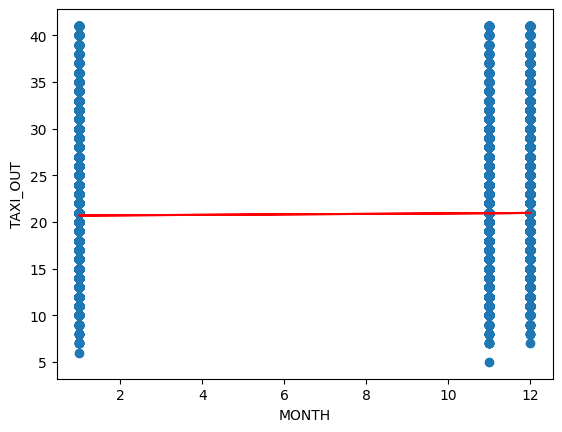

In [85]:
## choosing feature=x as Humidity vs target=y as TAXI_OUT
## Reshape 'x' from 1 D array to a 2d array 
x = flight['MONTH'].values.reshape(-1,1)
y = flight['TAXI_OUT'].values.reshape(-1,1)

# creat aLinear Regression model
LR = LinearRegression()

# fitting the model
LR.fit(x,y)
# making prediction
y_pred = LR.predict(x)
# checking the shape of 'y' and 'y-pred'
print(y.shape)
print(y_pred.shape)


plt.scatter(x,y)
plt.plot(x,y_pred, color = 'red')
plt.xlabel ('MONTH')
plt.ylabel('TAXI_OUT')
plt.show

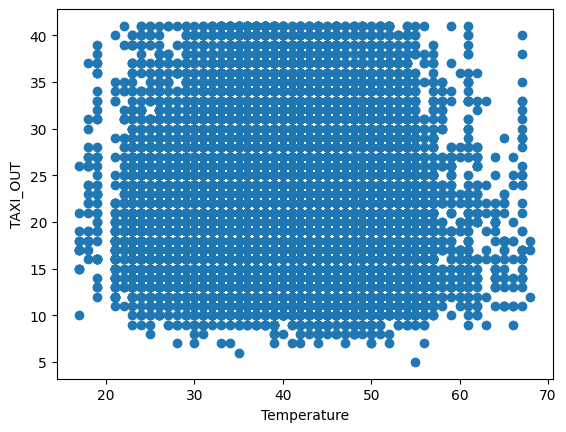

In [88]:
##scater plot to see the relationship
plt.scatter(flight['Temperature'], flight['TAXI_OUT'])

##label the axis
plt.xlabel('Temperature')
plt.ylabel('TAXI_OUT')
plt.show()

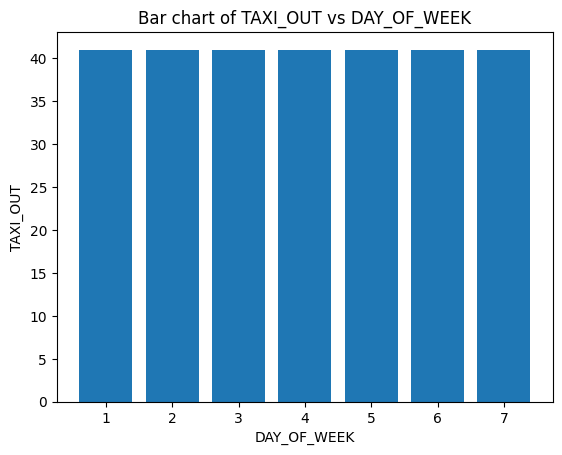

In [89]:
##creating bar chat when y-axis is TAXI_OUT and in x-axis some other features
x = flight['DAY_OF_WEEK']
y =flight['TAXI_OUT']

plt.bar(x, y)
plt.xlabel('DAY_OF_WEEK')
plt.ylabel('TAXI_OUT')
plt.title('Bar chart of TAXI_OUT vs DAY_OF_WEEK')
plt.show()

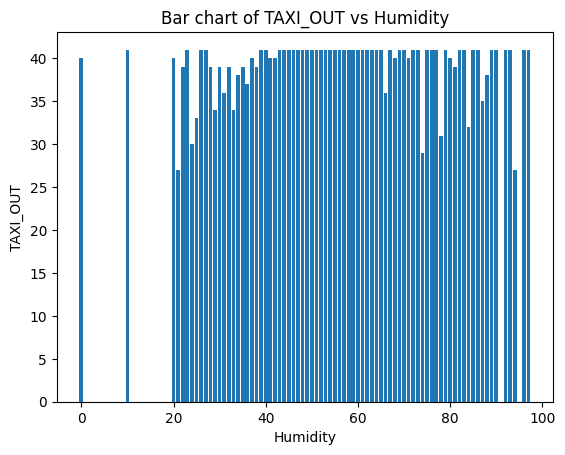

In [ ]:
# Choose a feature for the x-axis and TAXI_OUT for y-axis
x = flight['Humidity'] 
y = flight['TAXI_OUT']

plt.bar(x, y)
plt.xlabel('Humidity')  
plt.ylabel('TAXI_OUT')
plt.title('Bar chart of TAXI_OUT vs Humidity')  
plt.show()


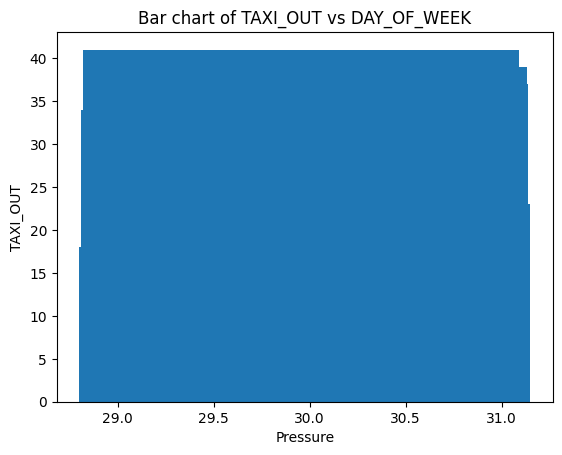

In [ ]:
##creating bar chat when y-axis is TAXI_OUT and in x-axis some other features
x = flight['Pressure']
y =flight['TAXI_OUT']

plt.bar(x, y)
plt.xlabel('Pressure')
plt.ylabel('TAXI_OUT')
plt.title('Bar chart of TAXI_OUT vs DAY_OF_WEEK')
plt.show()

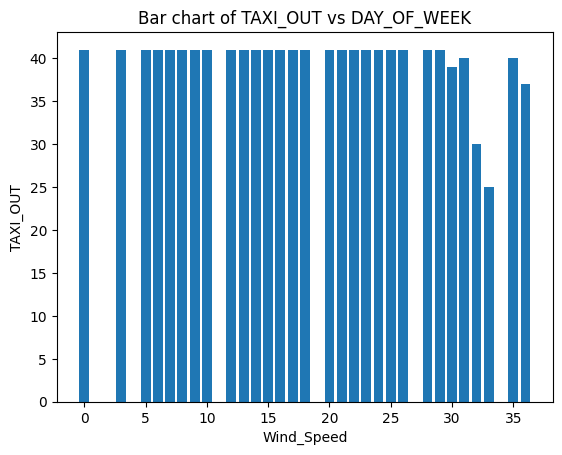

In [ ]:
##creating bar chat when y-axis is TAXI_OUT and in x-axis some other features
x = flight['Wind Speed']
y =flight['TAXI_OUT']

plt.bar(x, y)
plt.xlabel('Wind_Speed')
plt.ylabel('TAXI_OUT')
plt.title('Bar chart of TAXI_OUT vs DAY_OF_WEEK')
plt.show()

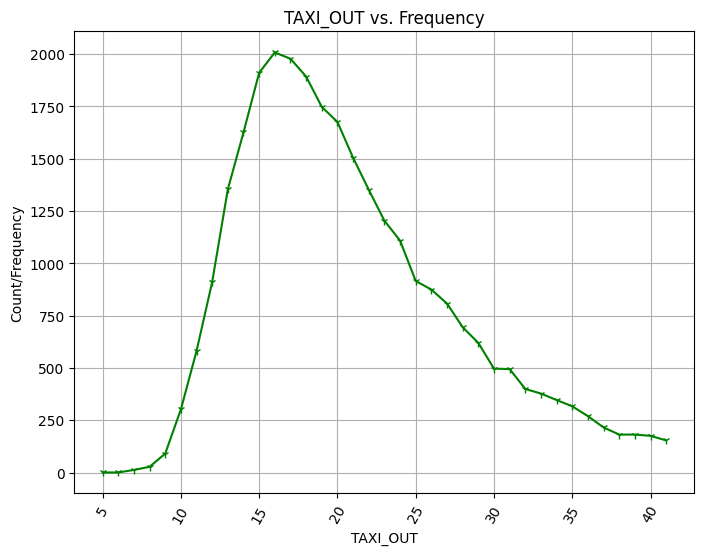

In [ ]:
## creating a line graph of count(Frequency) of Taxi_out
X = flight['TAXI_OUT'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.plot( X.index, X.values, marker='1', linestyle='-', color='green')
plt.title('TAXI_OUT vs. Frequency')
plt.xlabel('TAXI_OUT')
plt.ylabel('Count/Frequency')
plt.xticks(rotation=60)
plt.grid(True)  # Add grid lines for better readability
plt.show()

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


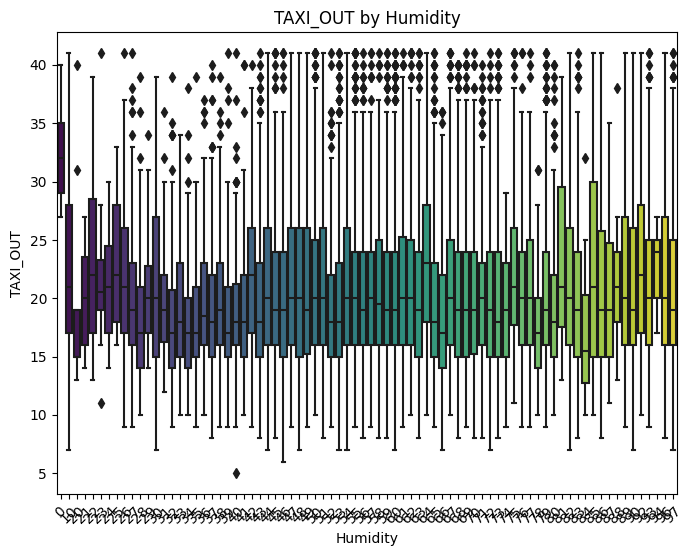

In [ ]:
## TAXI_OUT  by Humidity
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

sns.boxplot(x='Humidity', y='TAXI_OUT', data=flight, palette='viridis')
plt.title('TAXI_OUT by Humidity')
plt.xlabel('Humidity')
plt.ylabel('TAXI_OUT')
plt.xticks(rotation=45)

plt.show()

In [ ]:
##Exploratory data analysis
##Correlation matrix
##weather, going with my gf, train ticket price, what time the last trian leavesis there a football match
corr_mat = flight.corr(numeric_only= True)
corr_mat

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.00,-0.01,0.03,0.05,-0.02,-0.00,0.00,0.00,-0.01,0.14,0.01,-0.04,-0.05,-0.09,-0.01,-0.02,0.02
DAY_OF_MONTH,-0.01,1.00,-0.03,-0.04,0.00,-0.00,0.00,0.00,0.01,-0.13,0.10,-0.09,-0.09,0.02,-0.00,0.00,-0.02
DAY_OF_WEEK,0.03,-0.03,1.00,-0.01,0.00,0.00,0.01,0.01,-0.00,0.01,0.00,0.10,0.13,0.10,0.02,0.01,0.03
DEP_DELAY,0.05,-0.04,-0.01,1.00,-0.03,-0.03,0.10,0.07,0.04,-0.03,-0.01,0.07,0.04,-0.06,-0.07,-0.01,0.03
CRS_ELAPSED_TIME,-0.02,0.00,0.00,-0.03,1.00,0.99,-0.03,-0.02,0.04,-0.02,0.02,-0.01,-0.01,0.01,0.08,-0.07,0.07
DISTANCE,-0.00,-0.00,0.00,-0.03,0.99,1.00,-0.04,-0.03,0.01,-0.01,0.02,-0.01,-0.01,0.01,0.06,-0.09,0.06
CRS_DEP_M,0.00,0.00,0.01,0.10,-0.03,-0.04,1.00,0.95,0.45,0.09,0.00,0.01,-0.01,-0.01,-0.03,0.50,0.04
DEP_TIME_M,0.00,0.00,0.01,0.07,-0.02,-0.03,0.95,1.00,0.47,0.10,-0.01,0.01,-0.01,-0.01,0.03,0.54,0.06
CRS_ARR_M,-0.01,0.01,-0.00,0.04,0.04,0.01,0.45,0.47,1.00,0.10,-0.03,0.01,0.00,-0.01,0.15,0.42,0.07
Temperature,0.14,-0.13,0.01,-0.03,-0.02,-0.01,0.09,0.10,0.10,1.00,0.05,0.01,-0.04,-0.38,-0.02,0.08,-0.07


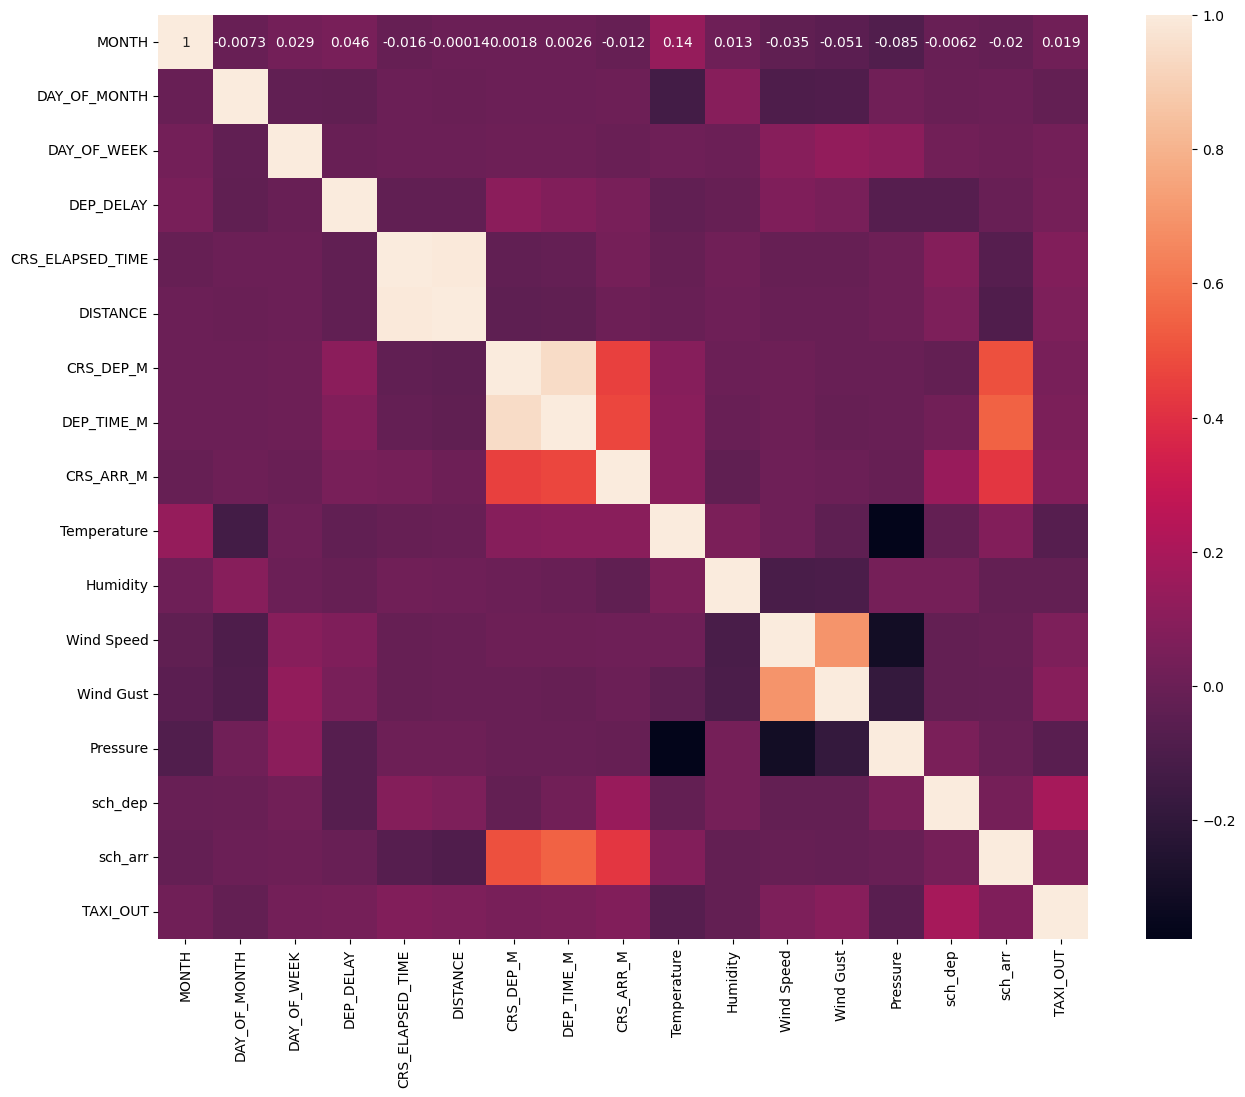

In [94]:
##plot the heatmap, Exploratory data analysis
##Correlation matrix

corr_mat = flight.corr(numeric_only= True)
corr_mat
plt.figure(figsize=(15, 12))
sns.heatmap(corr_mat, annot=True)
plt.show()

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


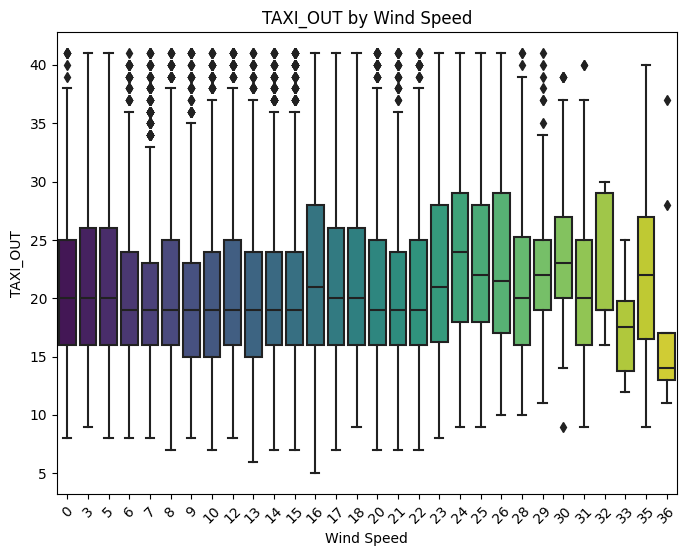

In [ ]:
## TAXI_OUT  by Wind Speed
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

sns.boxplot(x='Wind Speed', y='TAXI_OUT', data=flight, palette='viridis')
plt.title('TAXI_OUT by Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('TAXI_OUT')
plt.xticks(rotation=45)

plt.show()

In [95]:
import pandas as pd
from sklearn.linear_model import LinearRegression


# Create x and y variables
x = flight['DEP_DELAY'].values.reshape(-1, 1)
y = flight['TAXI_OUT']

# LR, Linear Regression model
LR = LinearRegression()

# Fit the model to my data
LR.fit(x, y)

# Make predictions
y_pred = LR.predict(x)
y_pred.shape

# Create a DataFrame to compare 'Actual' and 'Predicted' values
flight = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

flight

,Actual,Predicted
0,25,20.76
1,29,20.77
2,12,20.79
3,17,20.79
4,11,20.80
...,...,...
28815,16,20.95
28816,14,20.96
28817,17,21.06
28818,21,21.28


In [98]:
## Load the data
flight = pd.read_csv('M1_final.csv')
flight.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,5,2,DL,N101DU,MSP,-9,189,1029,419,...,53,93,SSW,10,0,30.23,Mostly Cloudy,17,15,25
1,11,23,6,DL,N101DU,MSP,-8,190,1029,980,...,28,60,SW,7,0,29.90,Cloudy,31,32,29
2,11,14,4,DL,N101DU,JAX,-5,163,828,510,...,20,54,N,5,0,30.46,Mostly Cloudy,53,20,12
3,11,5,2,DL,N101DU,IAH,-5,250,1417,895,...,50,69,WSW,13,0,30.11,Mostly Cloudy,26,35,17
4,11,6,3,DL,N101DU,DFW,-3,256,1391,1100,...,30,46,WSW,9,0,30.37,Fair,36,31,11


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression


# Create x and y variables
x = flight['MONTH'].values.reshape(-1, 1)
y = flight['TAXI_OUT']

# LR, Linear Regression model
LR = LinearRegression()

# Fit the model to my data
LR.fit(x, y)

# Make predictions
y_pred = LR.predict(x)
y_pred.shape

# Create a DataFrame to compare 'Actual' and 'Predicted' values
df= pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df

,Actual,Predicted
0,25,20.937458
1,29,20.937458
2,12,20.937458
3,17,20.937458
4,11,20.937458
...,...,...
28815,16,20.962859
28816,14,20.962859
28817,17,20.937458
28818,21,20.683453


In [99]:
import pandas as pd
from sklearn.linear_model import LinearRegression


# Create x and y variables
x = flight['Wind Speed'].values.reshape(-1, 1)
y = flight['TAXI_OUT']

# LR, Linear Regression model
LR = LinearRegression()

# Fit the model to my data
LR.fit(x, y)

# Make predictions
y_pred = LR.predict(x)
y_pred.shape

# Create a DataFrame to compare 'Actual' and 'Predicted' values
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df

,Actual,Predicted
0,25,20.70
1,29,20.49
2,12,20.35
3,17,20.90
4,11,20.63
...,...,...
28815,16,21.38
28816,14,20.90
28817,17,21.45
28818,21,21.52


In [ ]:
## Load the data
flight = pd.read_csv('M1_final.csv')
flight.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,5,2,DL,N101DU,MSP,-9,189,1029,419,...,53,93,SSW,10,0,30.23,Mostly Cloudy,17,15,25
1,11,23,6,DL,N101DU,MSP,-8,190,1029,980,...,28,60,SW,7,0,29.90,Cloudy,31,32,29
2,11,14,4,DL,N101DU,JAX,-5,163,828,510,...,20,54,N,5,0,30.46,Mostly Cloudy,53,20,12
3,11,5,2,DL,N101DU,IAH,-5,250,1417,895,...,50,69,WSW,13,0,30.11,Mostly Cloudy,26,35,17
4,11,6,3,DL,N101DU,DFW,-3,256,1391,1100,...,30,46,WSW,9,0,30.37,Fair,36,31,11


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
from sklearn.model_selection import RepeatedKFold

x = flight['Wind Speed'].values.reshape(-1,1)
y = flight['TAXI_OUT'].values.reshape(-1,1)

##define our model
model_lasso = Lasso(alpha=0.10)
model_ridge = Ridge(alpha= 10)

##train our model
model_lasso.fit(x,y)
model_ridge.fit(x,y)

# Creating a New data point to make predictions, 6 is the column number of DEP_DELAY
new_data_point = np.array([[16]])  # Replace 5 with the actual value to predict

# predictions using Ridge and Lasso models
lasso_prediction = model_lasso.predict(new_data_point)
ridge_prediction = model_ridge.predict(new_data_point)

print('Lasso Prediction:', lasso_prediction)
print('Ridge Prediction:', ridge_prediction)


Lasso Prediction: [21.09790572]
Ridge Prediction: [[21.10717512]]


In [ ]:
from sklearn.linear_model import Lasso, Ridge
## group the data into x and y
x = flight['DEP_DELAY'].values.reshape(-1,1)
y = flight['TAXI_OUT'].values.reshape(-1,1)
##define our model
model_lasso = Lasso(alpha=0.10)
model_ridge = Ridge(alpha= 10)

##train our model
model_lasso.fit(x,y)
model_ridge.fit(x,y)

new = flight.iloc[28815, 22]
new = new.reshape(1,-1)


print('Lasso Prediction:', lasso_prediction)
print('Ridge Prediction:', ridge_prediction)

Lasso Prediction: [21.09790572]
Ridge Prediction: [[21.10717512]]


In [ ]:
from sklearn.linear_model import Lasso, Ridge
## group the data into x and y
x = flight['Wind Speed'].values.reshape(-1,1)
y = flight['TAXI_OUT'].values.reshape(-1,1)
##define our model
model_lasso = Lasso(alpha=0.10)
model_ridge = Ridge(alpha= 10)

##train our model
model_lasso.fit(x,y)
model_ridge.fit(x,y)

new = flight.iloc[28815, 22]
new = new.reshape(1,-1)


print('Lasso Prediction:', lasso_prediction)
print('Ridge Prediction:', ridge_prediction)

Lasso Prediction: [20.43901066]
Ridge Prediction: [[20.42276122]]


In [ ]:
##tunning alpha

x = flight['Wind Speed'].values.reshape(-1,1)
y = flight['TAXI_OUT'].values.reshape(-1,1)

cv = RepeatedKFold(n_splits=2, n_repeats=1, random_state=32)

# define the model
model = RidgeCV(alphas=(0.5, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

## fit the model
model.fit(x, y)

##summaraize the chosen configuration
print('alpha: %2f' % model.alpha_)

alpha: 1.000000


In [ ]:
## Load the data
flight = pd.read_csv('M1_final.csv')
flight.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,5,2,DL,N101DU,MSP,-9,189,1029,419,...,53,93,SSW,10,0,30.23,Mostly Cloudy,17,15,25
1,11,23,6,DL,N101DU,MSP,-8,190,1029,980,...,28,60,SW,7,0,29.90,Cloudy,31,32,29
2,11,14,4,DL,N101DU,JAX,-5,163,828,510,...,20,54,N,5,0,30.46,Mostly Cloudy,53,20,12
3,11,5,2,DL,N101DU,IAH,-5,250,1417,895,...,50,69,WSW,13,0,30.11,Mostly Cloudy,26,35,17
4,11,6,3,DL,N101DU,DFW,-3,256,1391,1100,...,30,46,WSW,9,0,30.37,Fair,36,31,11


In [ ]:
## select the data
## we want to say ant to the relation of DEP_DELAYand TAXI_OUT
x = flight['Pressure'].values.reshape(-1,1)
y = flight['TAXI_OUT'].values.reshape(-1,1)

## splitting our data
## 8o% training 20% for testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

x_train.shape
x_test.shape

lin_reg = LinearRegression()

lin_reg.fit(x_train,y_train)

y_pred =lin_reg.predict(x_test)

# Create a DataFrame to compare 'Actual' and 'Predicted' values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df


,Actual,Predicted
0,19,20.84
1,33,20.88
2,25,20.90
3,17,20.84
4,21,20.29
...,...,...
5759,26,20.76
5760,18,20.52
5761,24,22.08
5762,26,20.81


In [ ]:
## Model Evaluation
## Mean the absolout error
## Mean squared error
## Root mean squared error
## R squared

print('MAE:', metrics. mean_absolute_error(y_test, y_pred))
print('MAE:', metrics. mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics. r2_score(y_test, y_pred))

MAE: 5.467922752588068
MAE: 46.48610151701025
RMSE: 6.818071686115529
R2: 0.0024665138087999194


In [ ]:
from sklearn.linear_model import Lasso, Ridge
import numpy as np

# Group the data into x and y
x = flight['Wind Speed'].values.reshape(-1, 1)
y = flight['TAXI_OUT'].values.reshape(-1, 1)

# Define our model
model_lasso = Lasso(alpha=0.10)
model_ridge = Ridge(alpha=10)

# Train our model
model_lasso.fit(x, y)
model_ridge.fit(x, y)

# Make predictions using Ridge and Lasso models

# Create an array of values for prediction (assuming a single new data point)
new_data_point = np.array([16]).reshape(-1, 1)  

lasso_prediction = model_lasso.predict(new_data_point)
ridge_prediction = model_ridge.predict(new_data_point)

print('Lasso Prediction:', lasso_prediction)
print('Ridge Prediction:', ridge_prediction)


Lasso Prediction: [21.09790572]
Ridge Prediction: [[21.10717512]]


In [ ]:
print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2', metrics.r2_score(y_test, y_pred))

MAE 5.467922752588067
MSE 46.48610151701023
RMSE 6.818071686115528
R2 0.0024665138088001415


In [ ]:
x = flight['Pressure'].values.reshape(-1,1)
y = flight['TAXI_OUT'].values.reshape(-1,1)

In [ ]:
## Model Evaluation
## Mean the absolout error
## Mean squared error
## Root mean squared error
## R squared

print('MAE:', metrics. mean_absolute_error(y_test, y_pred))
print('MAE:', metrics. mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics. r2_score(y_test, y_pred))

MAE: 6.416551006245663
MAE: 76.37664816099931
RMSE: 8.739373442129551
R2: -0.6389471609220976


In [ ]:
## select the data
## we want to say ant to the relation of DEP_DELAY and TAXI_OUT
X = flight.iloc[:, [6,22]]
y = flight.iloc[:, 22]

## splitting our data
## 8o% training 20% for testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

x_train.shape
x_test.shape


##Linear Regression without doing standard scalar
lin_reg = LinearRegression()

lin_reg.fit(x_train,y_train)

y_pred =lin_reg.predict(x_test)

## create our naive bayes model
gausian_model = GaussianNB()
## train our model
gausian_model.fit(x_train, y_train)

y_pred =lin_reg.predict(x_test)

## make prediction
y_pred = gausian_model.predict(x_test)


##Create a dataframe  for Prediction
pd.DataFrame({'Actual_TAXI_OUT': y_test, 'predicted_TAXI_OUT': y_pred})


,Actual_TAXI_OUT,predicted_TAXI_OUT
9362,19,18
23840,33,6
24617,25,18
24899,17,18
2007,21,17
...,...,...
25685,26,18
376,18,18
10922,24,18
7106,26,18


In [ ]:
## Model Evaluation
## Mean the absolout error
## Mean squared error
## Root mean squared error
## R squared

print('MAE:', metrics. mean_absolute_error(y_test, y_pred))
print('MAE:', metrics. mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics. r2_score(y_test, y_pred))

MAE: 6.823560027758501
MAE: 85.91273421235253
RMSE: 9.26891224536906
R2: -0.8435796177854638


In [ ]:
## select the data
## we want to the relation of WIND Speed and TAXI_OUT
X = flight.iloc[:, [16,22]]
y = flight.iloc[:, 22]

## splitting our data
## 8o% training 20% for testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

x_train.shape
x_test.shape

##Linear Regression
lin_reg = LinearRegression()

##standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##Linear Regression
lin_reg = LinearRegression()

lin_reg.fit(x_train,y_train)

y_pred =lin_reg.predict(x_test)

## create our naive bayes model
gausian_model = GaussianNB()
## train our model
gausian_model.fit(x_train, y_train)

y_pred =lin_reg.predict(x_test)

## make prediction
y_pred = gausian_model.predict(x_test)


##Create a dataframe  for Prediction
pd.DataFrame({'Actual_TAXI_OUT': y_test, 'predicted_TAXI_OUT': y_pred})


,Actual_TAXI_OUT,predicted_TAXI_OUT
9362,19,18
23840,33,6
24617,25,18
24899,17,18
2007,21,17
...,...,...
25685,26,18
376,18,18
10922,24,18
7106,26,18


In [ ]:
# Model Evaluation  for Wind_SPeed
## Mean the absolout error
## Mean squared error
## Root mean squared error
## R squared

print('MAE:', metrics. mean_absolute_error(y_test, y_pred))
print('MAE:', metrics. mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics. r2_score(y_test, y_pred))

MAE: 6.823560027758501
MAE: 85.91273421235253
RMSE: 9.26891224536906
R2: -0.8435796177854638
